# **Convolution Operation**


In [241]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

Original Image Shape: (256, 256)


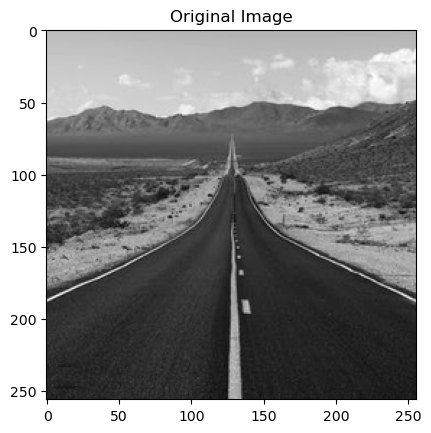

In [242]:
image = cv2.imread('img/road.bmp', cv2.IMREAD_GRAYSCALE)

plt.title('Original Image')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
print('Original Image Shape:', image.shape)

### Identity Kernel Using Library Function


In [243]:
#Identity Kernel Filter
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

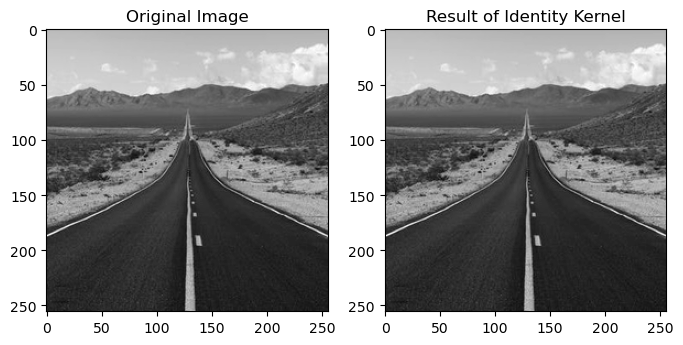

In [244]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(identity, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Identity Kernel')

### Identity Kernel Without Using Library Function


In [245]:
#Identity Kernel Filter
kernel = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
# add 1 row of zeros (value=0) in Top & Bottom of image
# add 1 column of zeros (value=0) in Left and Right of image
# if kernel was 5*5 then we need to add (5-1)/2=2 row & col at all border sides.
# Instead of adding 0 we could also create border by Interpolation
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image: create an np array of image np arrays dimenstions where all value=0
output_image = np.zeros_like(image)

# Apply the filter using for loops
# image shape[i] : i=0 -> height, i=1 ->width, i=2 -> color channel

# i,j did not start from 0 and not end in n: --> they were not in original image. Border is made by us.
for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
        # Compute the convolution using the Laplacian kernel
        convolution = np.sum(kernel * padded_image[i-1:i+2, j-1:j+2])

        # Set the corresponding pixel in the output image to the convolution value
        output_image[i-1, j-1] = convolution

In [246]:
print('kernel:\n',kernel,'\noriginal_image:\n',image)

kernel:
 [[0 0 0]
 [0 1 0]
 [0 0 0]] 
original_image:
 [[185 185 185 ... 178 178 178]
 [185 185 185 ... 178 178 178]
 [188 188 188 ... 179 179 179]
 ...
 [ 39  39  36 ...  30  30  29]
 [ 49  39  32 ...  31  32  34]
 [ 40  29  33 ...  30  30  30]]


In [247]:
print('padded_image:\n',padded_image,'\noutput_image:\n',output_image)

padded_image:
 [[  0   0   0 ...   0   0   0]
 [  0 185 185 ... 178 178   0]
 [  0 185 185 ... 178 178   0]
 ...
 [  0  49  39 ...  32  34   0]
 [  0  40  29 ...  30  30   0]
 [  0   0   0 ...   0   0   0]] 
output_image:
 [[185 185 185 ... 178 178 178]
 [185 185 185 ... 178 178 178]
 [188 188 188 ... 179 179 179]
 ...
 [ 39  39  36 ...  30  30  29]
 [ 49  39  32 ...  31  32  34]
 [ 40  29  33 ...  30  30  30]]


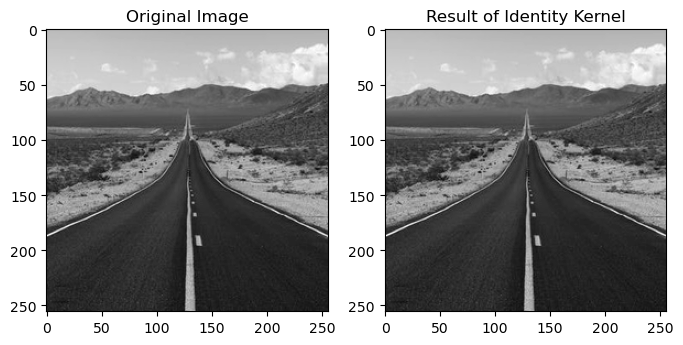

In [248]:
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Identity Kernel')

# Smoothing Spatial Filtering

- Image smoothing filters are applied to reduce the amount of noise in an image.
- This process involves convolution i.e. moving a kernel over the image pixels and computing new values.

1. Average Filter: Computes the average of the pixel values in the kernel.
2. Weighted Average Filter: Computes the weighted average of the pixel values in the kernel.
3. Median: Computes the median of all the pixel values in the kernel.
4. Minimum: Selects the least pixel value of all those in the kernel.
5. Maximum: Selects the highest pixel value of all those in the kernel.
6. Mid-Point: Computes the average of the maximum and minimum pixel values in the kernel.


**Standard Average Filtering Using Libray Function**


In [249]:
# Image Blurring using a Custom Kernel
kernel1 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])
kernel1=kernel1/9
blurr = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

print('kernel:\n',kernel1,'\nimage:\n',image,'\nblurr:\n',blurr)


kernel:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 
image:
 [[185 185 185 ... 178 178 178]
 [185 185 185 ... 178 178 178]
 [188 188 188 ... 179 179 179]
 ...
 [ 39  39  36 ...  30  30  29]
 [ 49  39  32 ...  31  32  34]
 [ 40  29  33 ...  30  30  30]] 
blurr:
 [[185 185 185 ... 178 178 178]
 [186 186 186 ... 178 178 178]
 [187 187 187 ... 179 179 179]
 ...
 [ 38  38  38 ...  30  29  29]
 [ 38  37  36 ...  31  31  31]
 [ 39  38  36 ...  31  32  32]]


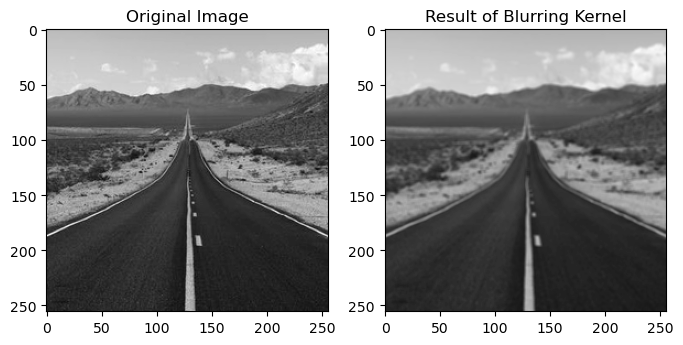

In [250]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(blurr, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Blurring Kernel')

### Standard Average Filtering Without Using Libray Function


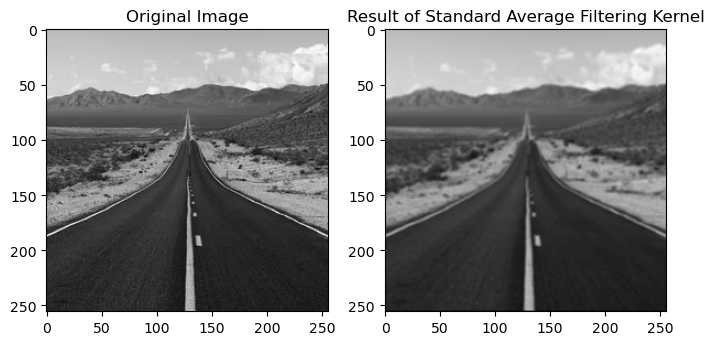

In [251]:
#Identity Kernel Filter
kernel = np.ones((3, 3), dtype=np.float32)/9
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Apply the filter using for loops
for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
        # Compute the convolution using the Laplacian kernel
        convolution = np.sum(kernel * padded_image[i-1:i+2, j-1:j+2])
        # Set the corresponding pixel in the output image to the convolution value
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Standard Average Filtering Kernel')

### Maximum Filetering Using Library Function


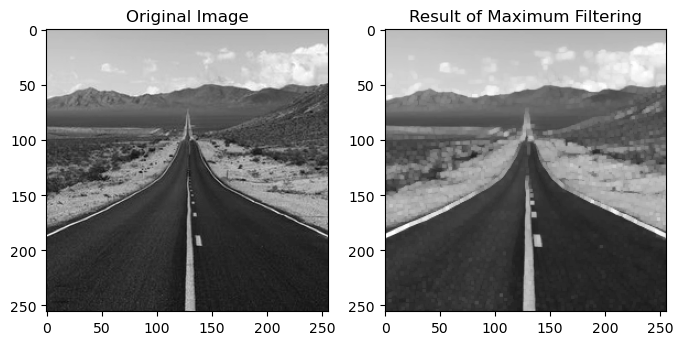

In [252]:
kernel = np.ones((3,3),np.uint8)
# Perform maximum filtering convolution using dilation
max_filtered = cv2.dilate(image, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(max_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Maximum Filtering')

### Maximum Filetering Without Using Library Function


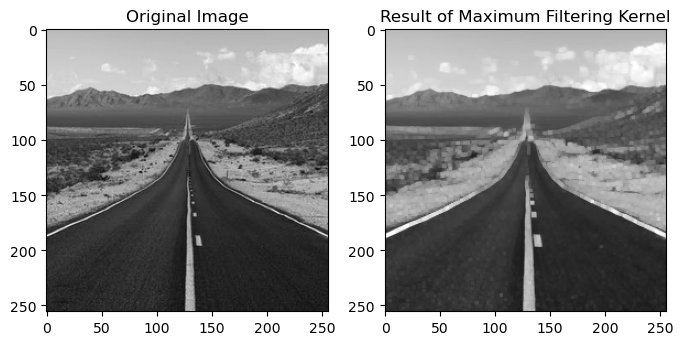

In [253]:
# Pad the image using cv2.copyMakeBorder
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Apply the filter using for loops
for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
        # Extract the 3x3 neighborhood around the current pixel
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Compute the maximum value in the neighborhood
        maximum = np.max(neighborhood)

        # Set the corresponding pixel in the output image to the maximum value
        output_image[i-1, j-1] = maximum
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Maximum Filtering Kernel')

### Minimum Filtering Using Library Function


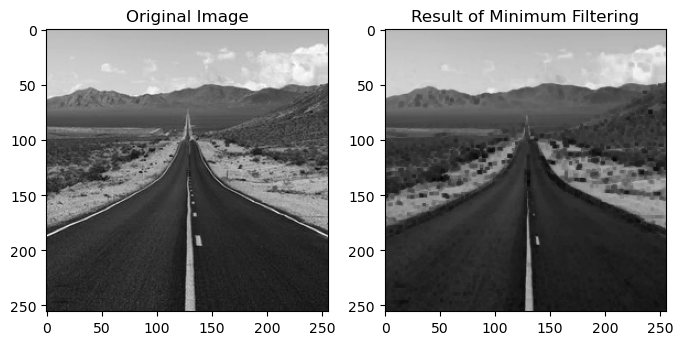

In [254]:
kernel = np.ones((3,3),np.uint8)
# Perform maximum filtering convolution using dilation
min_filtered = cv2.erode(image, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(min_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Minimum Filtering')

### Minimum Filtering Without Using Library Function


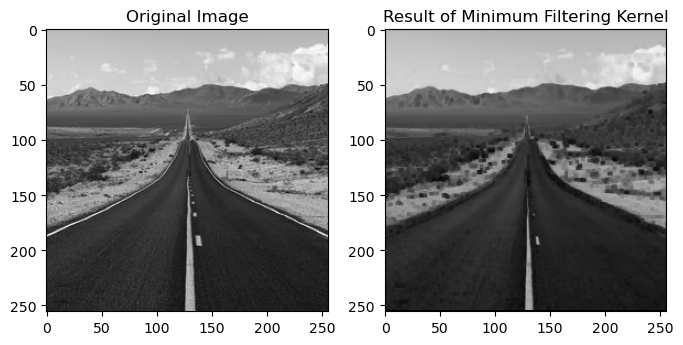

In [255]:
# Pad the image using cv2.copyMakeBorder
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output_image = np.zeros_like(image)

# Apply the filter using for loops
for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
        # Extract the 3x3 neighborhood around the current pixel
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Compute the maximum value in the neighborhood
        minimum = np.min(neighborhood)

        # Set the corresponding pixel in the output image to the maximum value
        output_image[i-1, j-1] = minimum
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Minimum Filtering Kernel')

### Median Filtering Using Library Function

- In median blurring, each pixel in the source image is replaced by the median value of the image pixels in the kernel area. In order to median blurring we can use **cv2.medianBlur(src, ksize)**
- This function has just two required arguments:

1. The first is the source image.
2. The second is the kernel size, which must be an odd, positive integer.


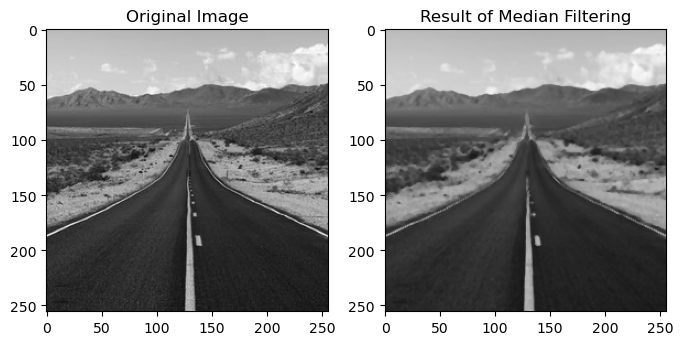

In [256]:
# Perform Median blurring using cv2.filter2D
median_filtered = cv2.medianBlur(image, 3)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(median_filtered, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Median Filtering')

### Median Filtering Without Using Library Function


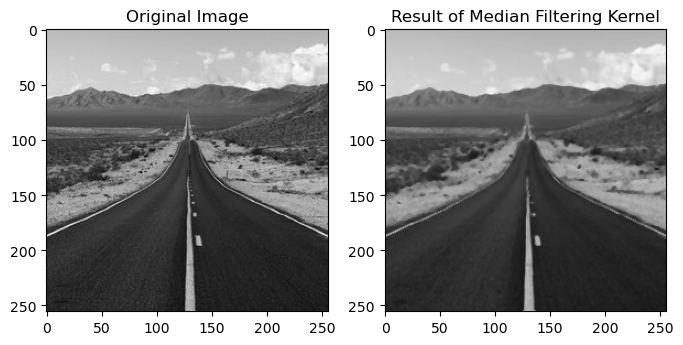

In [257]:
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=255)

# Create output image
output_image = np.zeros_like(image)

# Apply the filter using for loops
for i in range(1, padded_image.shape[0]-1):
    for j in range(1, padded_image.shape[1]-1):
        # Extract the 3x3 neighborhood around the current pixel
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Compute the median value in the neighborhood
        median = np.median(neighborhood)

        # Set the corresponding pixel in the output image to the median value
        output_image[i-1, j-1] = median
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Median Filtering Kernel')

### Weighted Averaging Filter Using Library Function


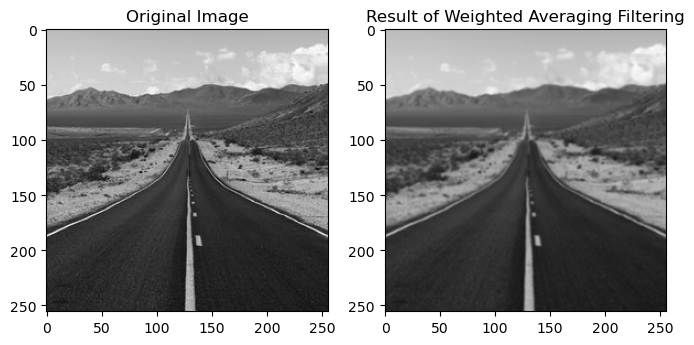

In [258]:
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0
weighted_filter = cv2.filter2D(image, -1, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(weighted_filter, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of Weighted Averaging Filtering')

### Weighted Averaging Filter Without Using Library Function


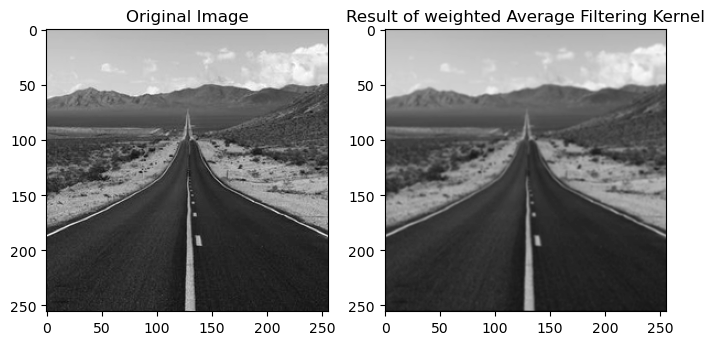

In [259]:
# Define filter kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])

# Normalize kernel
kernel = kernel / np.sum(kernel)

# Pad image
padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

# Create output image
output = np.zeros_like(image)

# Apply filter
for i in range(1, padded_image.shape[0] - 1):
    for j in range(1, padded_image.shape[1] - 1):
        # Compute the convolution using the Laplacian kernel
        convolution = np.sum(kernel * padded_image[i-1:i+2, j-1:j+2])
        # Set the corresponding pixel in the output image to the convolution value
        output_image[i-1, j-1] = convolution
#Display Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Result of weighted Average Filtering Kernel')

### Smoothing with Gaussian Filter

- The effect of applying the Gaussian filter is to blur an image and remove detail and noise.
- It uses a kernel that represents the shape of a Gaussian or bell-shaped hump.
- The Gaussian filter outputs a weighted average of each pixel’s neighborhood, with the average weighted more towards the value of the central pixels.
- In order to perform this we can use **cv2.GaussianBlur(src, ksize, sigmaX)**

- We should specify the width and height of the kernel which should be positive and odd.
- We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.
- If only sigmaX is specified, sigmaY is taken as the same as sigmaX.
- If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.


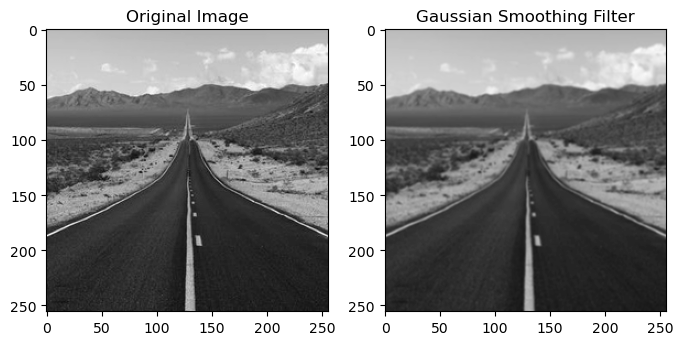

In [260]:
gaussian_filter = cv2.GaussianBlur(image, (3,3), 0)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(gaussian_filter, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Gaussian Smoothing Filter')

![](ss/GausianFilter.png)

# **Sharpening Spatial Filtering**

- Image sharpening involves emphasizing details and enhances the edges of objects in an image.

1. Laplace Filter
2. Unsharp Mask & HighBoost Filtering
3. Gradient Mask filtering (Sobel Operator)


### Laplacian Filtering Using Library Function


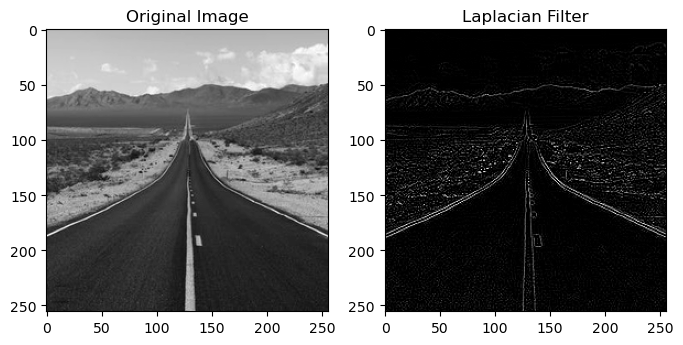

In [261]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('img/road.bmp', cv2.IMREAD_GRAYSCALE)
# Laplace Filter
kernel = np.array([[0, 1, 0],
                   [1,-4, 1],
                   [0, 1, 0]])

laplacian = cv2.filter2D(image, -1, kernel)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Laplacian Filter')

![](ss/LaplacianFilter.png)

### Unsharp Masking and Highboost Filtering


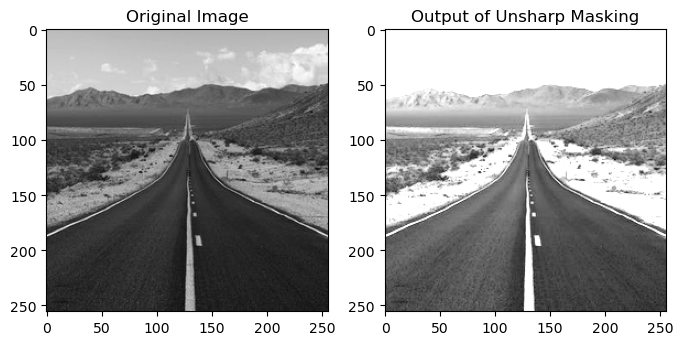

In [262]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (7,7), 0)
#Mask
mask = cv2.subtract(image, gaussian_blur)
k = 1
output_image = cv2.addWeighted(image, 1 + k, mask, -k, 0)
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax5 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax5.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax5.title.set_text('Output of Unsharp Masking')

![](ss/UnsharpMasking.png)

### Highboost Filtering


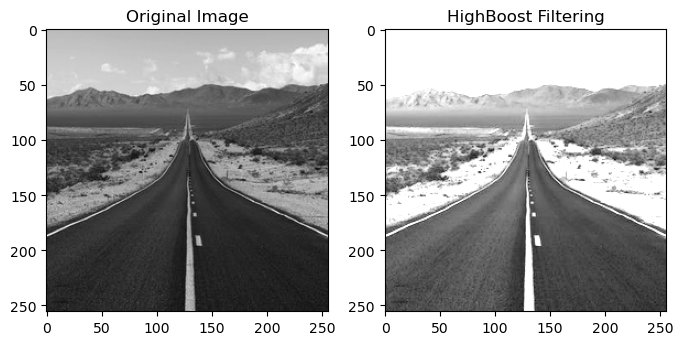

In [263]:
# HighBoost Filtering
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
highboost = cv2.filter2D(image, -1, kernel)
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax5 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax5.imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax5.title.set_text('HighBoost Filtering')

![](ss/HighboostFiltering.png)

### Sobel Operator


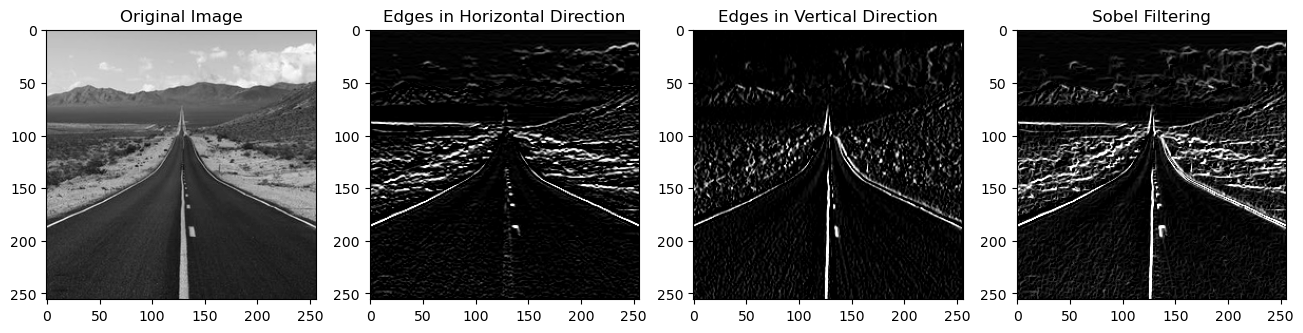

In [264]:
#Horizontal Edge Detection
sobel_h = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Apply kernel to image using cv2.filter2D
horizontal_edges = cv2.filter2D(image, -1, sobel_h).astype(np.float32)
#Vertical Edge Detection
sobel_v = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Apply kernel to image using cv2.filter2D
vertical_edges = cv2.filter2D(image, -1, sobel_v).astype(np.float32)
#Both in Vertical and Horizontal Direction
sobel = cv2.magnitude(vertical_edges, horizontal_edges)
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax1.imshow(image, cmap='gray', vmin=0, vmax=255)
ax1.title.set_text('Original Image')
ax2.imshow(horizontal_edges, cmap='gray', vmin=0, vmax=255)
ax2.title.set_text('Edges in Horizontal Direction')
ax3.imshow(vertical_edges, cmap='gray', vmin=0, vmax=255)
ax3.title.set_text('Edges in Vertical Direction')
ax4.imshow(sobel, cmap='gray', vmin=0, vmax=255)
ax4.title.set_text('Sobel Filtering')

![](ss/SobelOperator.png)

# Table for Transformation usage:
![](ss/Lab3_transformations.png)